In [1]:
import pandas as pd
from IPython.display import HTML

from collab2.foraging.toolkit import (
    _add_velocity,
    _generate_persistence_predictor,
    animate_predictors,
    dataObject,
    generate_local_windows,
    generate_persistence_predictor,
    plot_predictor,
    rescale_to_grid,
    subsample_frames_constant_frame_rate,
)

# Test underscored function

original_frames: 18739
original_shape: (74956, 5)
resulting_frames: 313
resulting_shape: (1252, 5)


/Users/Admin/Repositories/collab-creatures/collab2/foraging/toolkit/utils.py:42: UserWarning: 
                NaN values in data. The default behavior of predictor/score generating functions is
                to ignore foragers with missing positional data. To modify, see documentation of
                `derive_predictors_and_scores` and `generate_local_windows`
                
  warnings.warn(


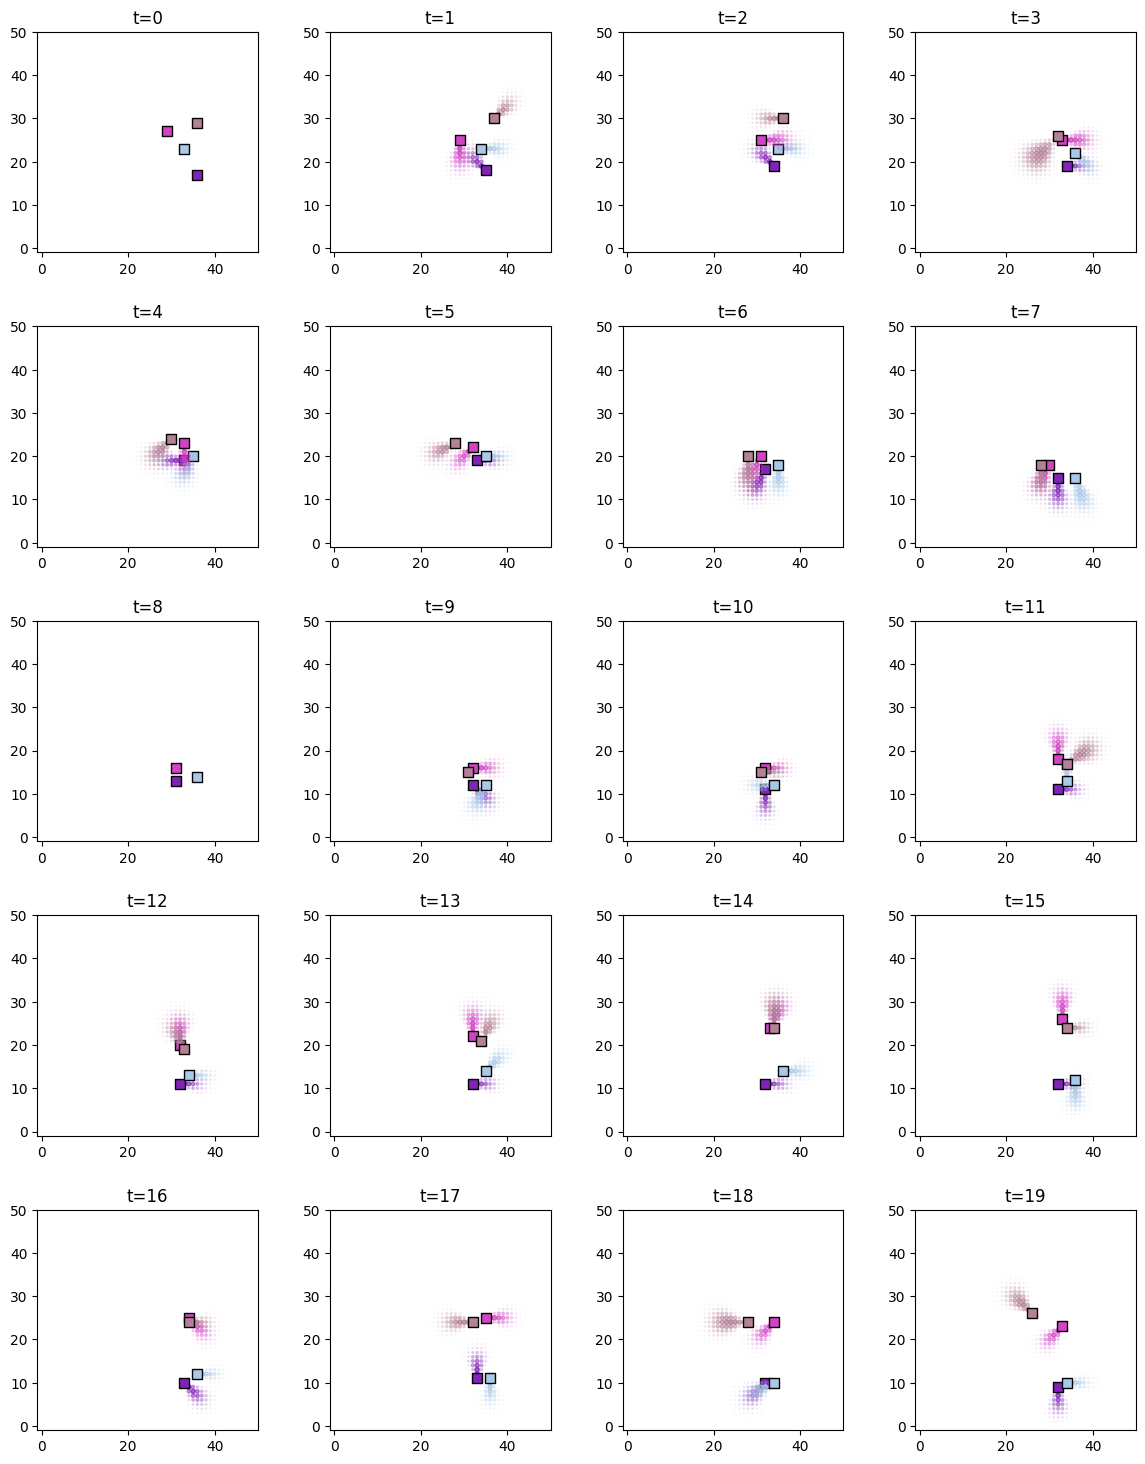

In [4]:
# load data
fish_data = pd.read_csv("4wpf_test.csv")
gridMin = 0
gridMax = 300
grid_size = 50
fps = 121

# scaling and subsampling
fishDF_scaled = rescale_to_grid(
    fish_data, size=grid_size, gridMin=gridMin, gridMax=gridMax
)
fishDF_scaled_subsampled = subsample_frames_constant_frame_rate(
    fishDF_scaled, frame_spacing=60
)

# create a test foragers object with 20 frames
num_frames = 20
foragers_object = dataObject(
    fishDF_scaled_subsampled.loc[fishDF_scaled_subsampled["time"] < 20],
    grid_size=grid_size,
)

# get local windows
local_windows_kwargs = {
    "window_size": grid_size / 2,
    "sampling_fraction": 1,
    "skip_incomplete_frames": True,
}

foragers_object.local_windows_kwargs = local_windows_kwargs

local_windows = generate_local_windows(foragers_object)
foragers_object.local_windows = local_windows

# add velocity and compute predictor using unexposed function
foragers, foragersDF = _add_velocity(foragers_object.foragers, dt=1)
predictor = _generate_persistence_predictor(
    foragers,
    local_windows,
    predictor_name="pred",
    dt=1,
    sigma_v=3,
    sigma_t=0.3,
)

# visualize predictor
plot_predictor(
    foragers,
    predictor,
    "pred",
    [0, 1, 2, 3],
    range(num_frames),
    grid_size,
    size_multiplier=10,
    random_state=99,
)

# Test the pipeline with non-underscored function

In [5]:
# choose predictor parameters and add to object
predictor_kwargs = {
    "persistence": {
        "dt": 1,
        "sigma_v": 3,
        "sigma_t": 0.3,
    }
}

foragers_object.predictor_kwargs = predictor_kwargs

predictor = generate_persistence_predictor(foragers_object, "persistence")

# Animate

/Users/Admin/Repositories/collab-creatures/collab2/foraging/toolkit/visualization.py:138: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
2024-09-09 11:42:37,793 - Animation.save using <class 'matplotlib.animation.HTMLWriter'>


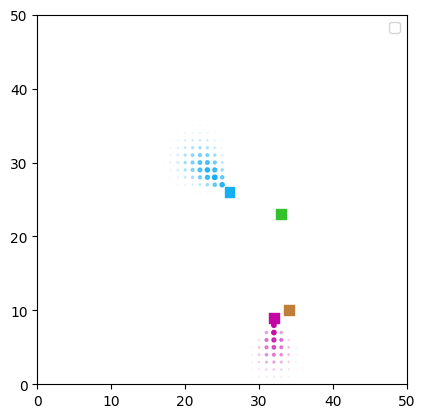

In [6]:
ani = animate_predictors(
    foragers_object.foragersDF,
    predictor,
    predictor_name="persistence",
    forager_index=[0, 3],
    grid_size=grid_size,
    random_state=10,
    size_multiplier=10,
)
HTML(ani.to_jshtml())